In [1]:
import pandas as pd

In [2]:
# Read the CSV file into a Pandas DataFrame
kidney_df_cleaned = pd.read_csv("merged/kidney_clean_20.csv")
kidney_df_cleaned

,Unnamed: 0,Transplant Year,Age Group,Number_of_Transplants,Graft_Survival_Rate_20,Patient_Survival_Rate_20,Blood_O,Blood_A,Blood_B,Blood_AB,...,Retransplant/Graft Failure,Tubular and Interstitial Diseases,"White, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,Unknown,"Asian, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic"
0,0,2002,<1 Year,5,0.00,0.00,2,2,0,1,...,0,2,157,31,54,0,7,3,0,3
1,1,2002,1-5 Years,137,38.11,90.08,72,54,15,0,...,2,11,256,94,102,0,19,2,2,2
2,2,2002,6-10 Years,146,25.11,72.87,77,56,15,9,...,8,14,163,47,60,1,5,2,0,1
3,3,2002,11-17 Years,385,16.58,67.76,233,161,51,20,...,74,48,447,131,127,2,21,7,6,5
4,4,2002,18-34,2100,28.68,58.70,1175,972,310,116,...,426,137,2030,814,568,1,139,14,13,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,116,1988,11-17 Years,271,19.41,66.35,182,163,44,18,...,3,62,356,103,62,3,11,4,0,0
117,117,1988,18-34,2076,24.23,50.51,1286,1060,322,125,...,10,235,2419,603,303,3,83,16,7,0
118,118,1988,35-49,2579,17.21,27.50,1486,1274,383,146,...,8,201,3196,838,291,5,109,43,1,0
119,119,1988,50-64,1654,10.71,10.48,876,730,232,88,...,2,112,2487,490,179,6,60,20,3,0


In [28]:
def avg_survival_by_feature(df, feature_name, feature_value):
    temp_df = df[df[feature_name]==feature_value]
    survival_rate = temp_df.groupby("Transplant Year").agg({"Patient_Survival_Rate_20": "mean"})["Patient_Survival_Rate_20"]
    return survival_rate.values

def total_transplant_by_feature(df, feature_name, feature_value):
    temp_df = df[df[feature_name]==feature_value]
    total_transplants = temp_df.groupby("Transplant Year").agg({"Number_of_Transplants": "sum"})["Number_of_Transplants"]
    return total_transplants.values

def total_transplant_by_feature2(df, feature_name):
    total_transplants = df.groupby("Transplant Year").agg({feature_name: "sum"})[feature_name]
    return total_transplants.values

In [17]:
age_grps=kidney_df_cleaned['Age Group'].unique().tolist()
age_grps=age_grps[1:8]
age_grps

['1-5 Years', '6-10 Years', '11-17 Years', '18-34', '35-49', '50-64', '65+']

In [18]:
year_df = pd.DataFrame({"year": range(1988, 2003)})
for age_grp in age_grps:
    age_grp_survival = avg_survival_by_feature(kidney_df_cleaned, 'Age Group', age_grp)
    year_df[age_grp] = age_grp_survival
year_df

,year,1-5 Years,6-10 Years,11-17 Years,18-34,35-49,50-64,65+
0,1988,71.55,74.51,66.35,50.51,27.50,10.48,0.00
1,1989,79.60,69.44,63.44,50.99,28.71,11.05,0.00
2,1990,73.87,69.89,69.92,53.87,31.11,11.85,0.00
3,1991,83.95,73.96,71.37,52.89,29.85,12.15,0.00
4,1992,76.06,70.62,70.03,53.63,31.03,11.94,0.00
5,1993,85.33,81.44,69.15,56.10,33.26,11.70,0.00
6,1994,86.59,69.36,62.02,55.19,32.22,11.07,2.88
7,1995,75.15,74.46,66.91,58.16,36.02,14.64,3.26
8,1996,79.82,75.64,69.15,59.23,34.47,14.40,2.03
9,1997,81.80,73.31,63.40,59.41,36.05,14.18,3.12


Text(0, 0.5, 'Avg Survival by age group')

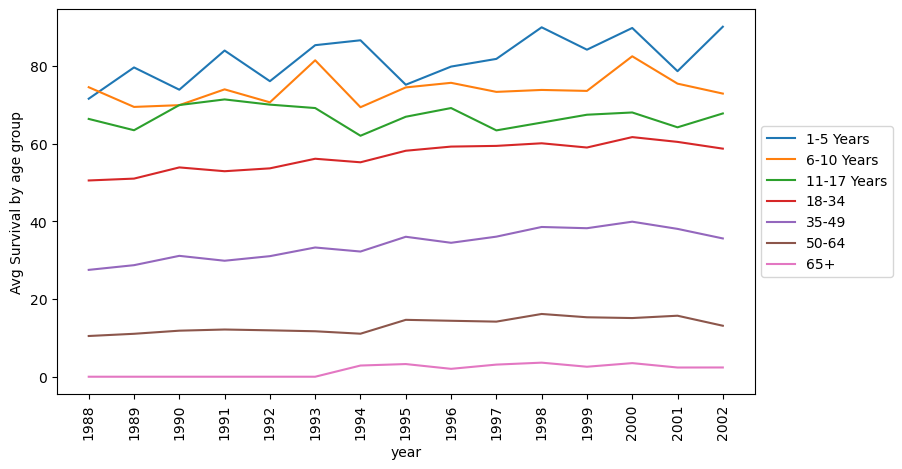

In [19]:
age_grps_cols = age_grps[0:8]
ax1 = year_df.plot.line(x="year", y=age_grps_cols, figsize=(9,5))
ax1.set_xticks(year_df["year"].values);
ax1.set_xticklabels(year_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Avg Survival by age group')

In [30]:
year_df = pd.DataFrame({"year": range(1988, 2003)})
for age_grp in age_grps:
    total_transplants = total_transplant_by_feature(kidney_df_cleaned, 'Age Group', age_grp)
    year_df[age_grp] = total_transplants
year_df

,year,1-5 Years,6-10 Years,11-17 Years,18-34,35-49,50-64,65+
0,1988,81,83,271,2076,2579,1654,195
1,1989,95,104,266,2059,2630,1688,191
2,1990,91,112,272,2178,2859,1947,274
3,1991,97,121,260,2209,2952,1971,318
4,1992,99,105,271,2128,3013,2113,395
5,1993,125,116,318,2322,3211,2452,427
6,1994,83,110,364,2250,3365,2582,489
7,1995,104,124,390,2184,3476,2798,577
8,1996,126,129,355,2127,3547,3011,658
9,1997,125,119,350,2055,3547,3336,688


Text(0, 0.5, 'Total Transplants by age group')

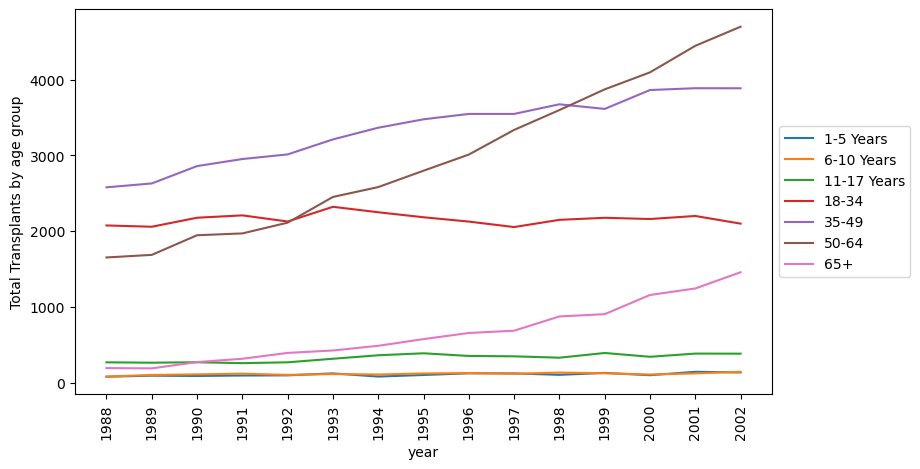

In [23]:
age_grps_cols = age_grps[0:8]
ax1 = year_df.plot.line(x="year", y=age_grps_cols, figsize=(9,5))
ax1.set_xticks(year_df["year"].values);
ax1.set_xticklabels(year_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Total Transplants by age group')

In [37]:
donors=['Deceased_Donor', 'Living_Donor']
year_df = pd.DataFrame({"year": range(1988, 2003)})
for donor in donors:
    total_transplants = total_transplant_by_feature2(kidney_df_cleaned, donor)
    year_df[donor] = total_transplants
year_df

,year,Deceased_Donor,Living_Donor
0,1988,10794,1829
1,1989,11222,1918
2,1990,12878,2123
3,1991,13329,2427
4,1992,13563,2571
5,1993,14733,2898
6,1994,15211,3088
7,1995,15921,3475
8,1996,15983,3782
9,1997,16266,4050


Text(0, 0.5, 'Total Transplants')

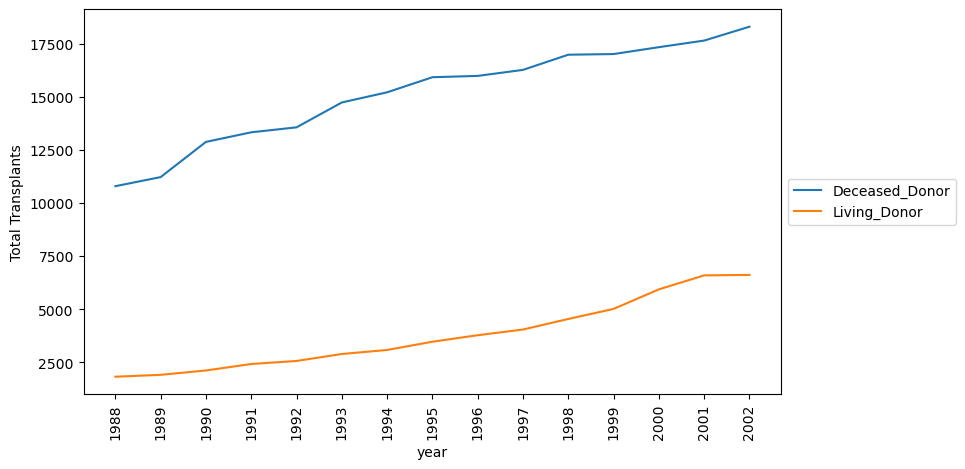

In [38]:
ax1 = year_df.plot.line(x="year", y=donors, figsize=(9,5))
ax1.set_xticks(year_df["year"].values);
ax1.set_xticklabels(year_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Total Transplants')

In [41]:
bgs=['Blood_O', 'Blood_A', 'Blood_B', 'Blood_AB']
year_df = pd.DataFrame({"year": range(1988, 2003)})
for bg in bgs:
    total_transplants = total_transplant_by_feature2(kidney_df_cleaned, bg)
    year_df[bg] = total_transplants
year_df

,year,Blood_O,Blood_A,Blood_B,Blood_AB
0,1988,4040,3413,1022,402
1,1989,3968,3263,1041,383
2,1990,4172,3721,1093,419
3,1991,4366,3760,1117,434
4,1992,4505,3674,1102,457
5,1993,4660,4060,1214,426
6,1994,4860,4046,1236,504
7,1995,4936,4292,1320,536
8,1996,5077,4474,1322,538
9,1997,5139,4586,1459,526


Text(0, 0.5, 'Total Transplants')

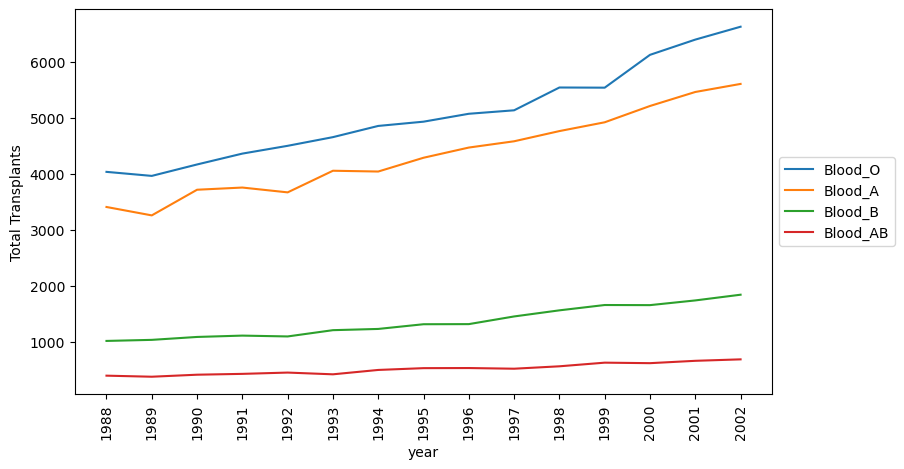

In [42]:

ax1 = year_df.plot.line(x="year", y=bgs, figsize=(9,5))
ax1.set_xticks(year_df["year"].values);
ax1.set_xticklabels(year_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Total Transplants')